In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

In [2]:
diabetes_df = pd.read_csv('/diabetes (2).csv')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
diabetes_df.shape

(768, 9)

In [4]:
diabetes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_df[diabetes_df.duplicated()]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [7]:
diabetes_df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [8]:
#Glucose and Insulin looks highly skewed as there is a huge difference between their mean and median.

In [9]:
diabetes_df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [10]:
diabetes_df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [11]:
#Average age of women with diabetes is around 37 and their average Glucose and Insulin levels indicate >100.
#These 2 features seems to be very important feature and should be given more weightage.

# Count(frequency)plot

<Axes: xlabel='Age', ylabel='count'>

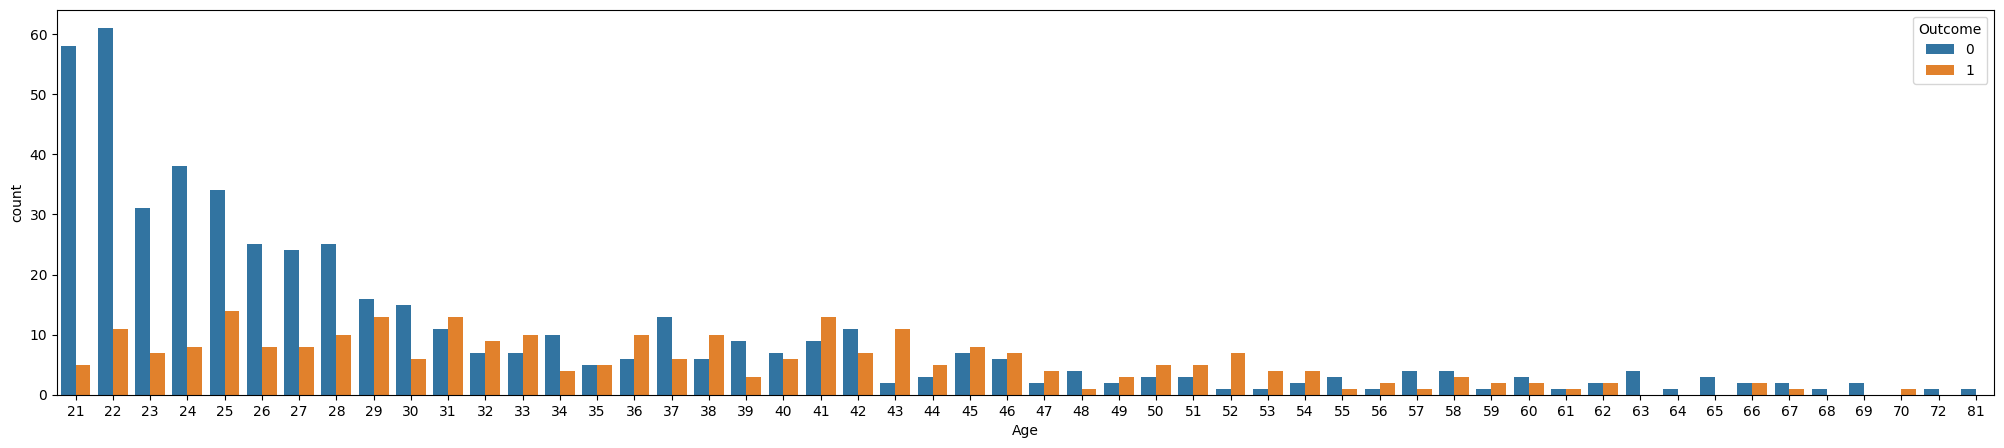

In [12]:
plt.figure(figsize=(25,5))
sns.countplot(x=diabetes_df.Age, hue=diabetes_df.Outcome)

In [13]:
#Observations:
#Women with the age between 21-25 are high in count.
#Women detected with diabetes fall between the age 25-31 and 36-43.

In [14]:
def plotGraph(df,plotName):
    ix = 1
    fig = plt.figure(figsize = (20,10))
    for c in list(df.columns):
        if(df[c].nunique() > 5):
            if ix <= 5:
                ax2 = fig.add_subplot(2,5,ix+5)
                ax2.tick_params(axis='y', labelrotation=90)
                if(c!='Outcome'):
                    if(plotName == 'boxplot'):
                        sns.boxplot(y=df[c], ax=ax2) #for boxplot
                    elif(plotName == 'histogram'):
                        plt.title(c)
                        df[c].hist(ax=ax2)
                    elif(plotName == 'distplot'):
                        plt.title(c)
                        sns.distplot(df[c], kde = True, ax=ax2, hist=False)
                    fig.tight_layout()
                ix = ix +1
                if ix == 6:
                    fig = plt.figure(figsize = (20,10))
                    ix = 1

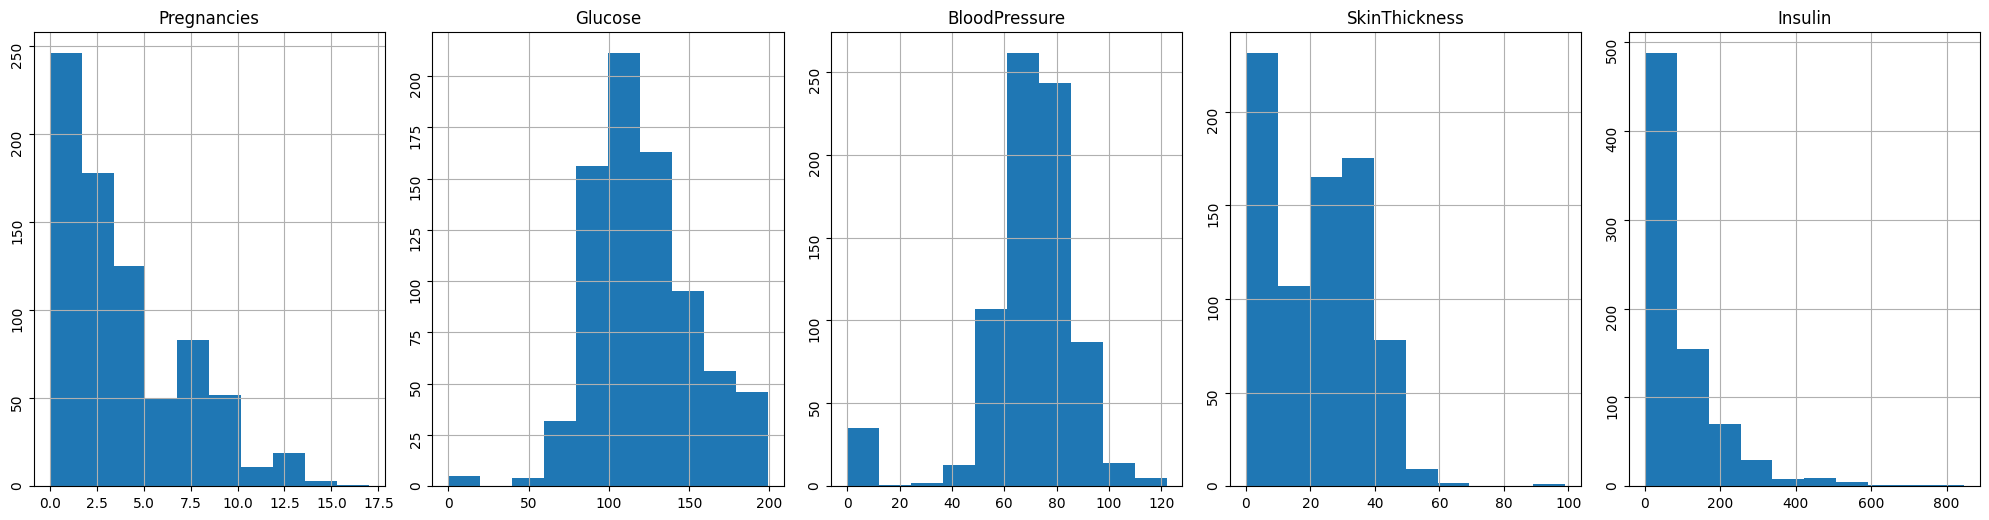

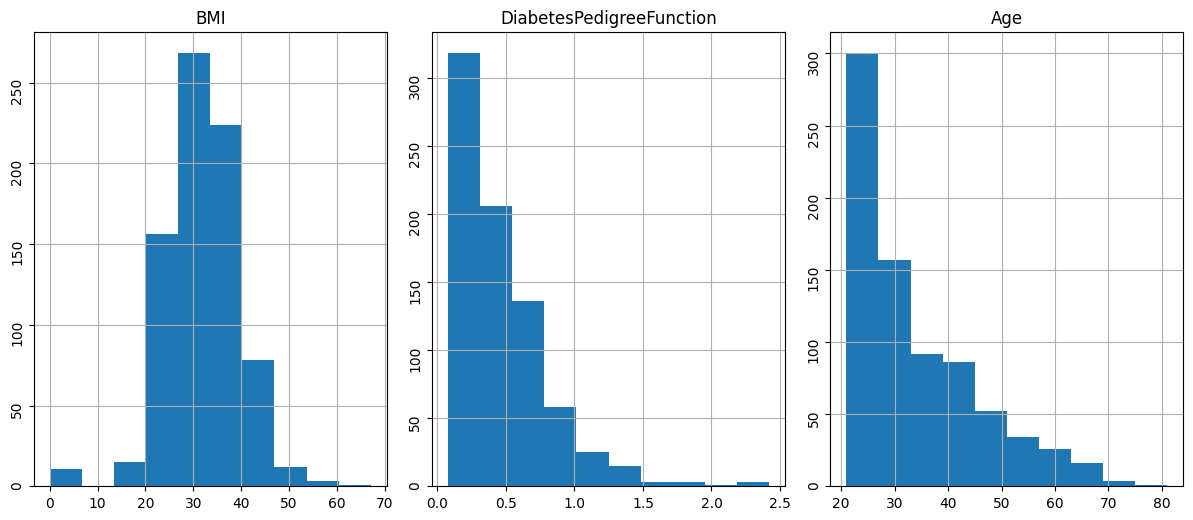

In [15]:
plotGraph(diabetes_df,'histogram')

In [16]:
#observations:
#Except for Pregnancies and age, remaining features are having values as 0.
#Glucose and Insulin values cannot be 0 for normal people. So this means that we need to impute these 0s.
#The same applies for SkinThickness, BloodPressure and BMI.

In [17]:
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
#Looks like a fairly balanced dataset.

<Axes: xlabel='Outcome', ylabel='count'>

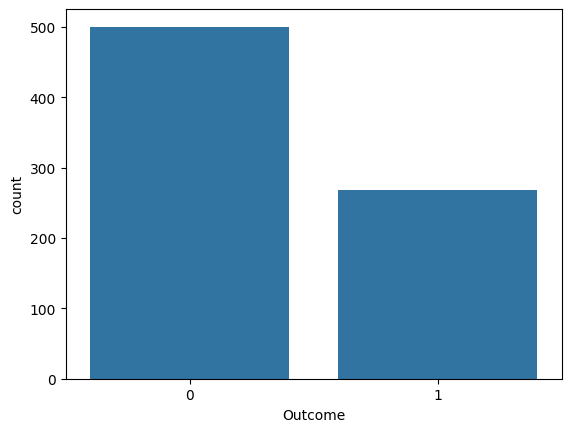

In [19]:
sns.countplot(x='Outcome',data=diabetes_df)

Text(0.5, 1.0, 'Distribution of Diabetic data \n\n ')

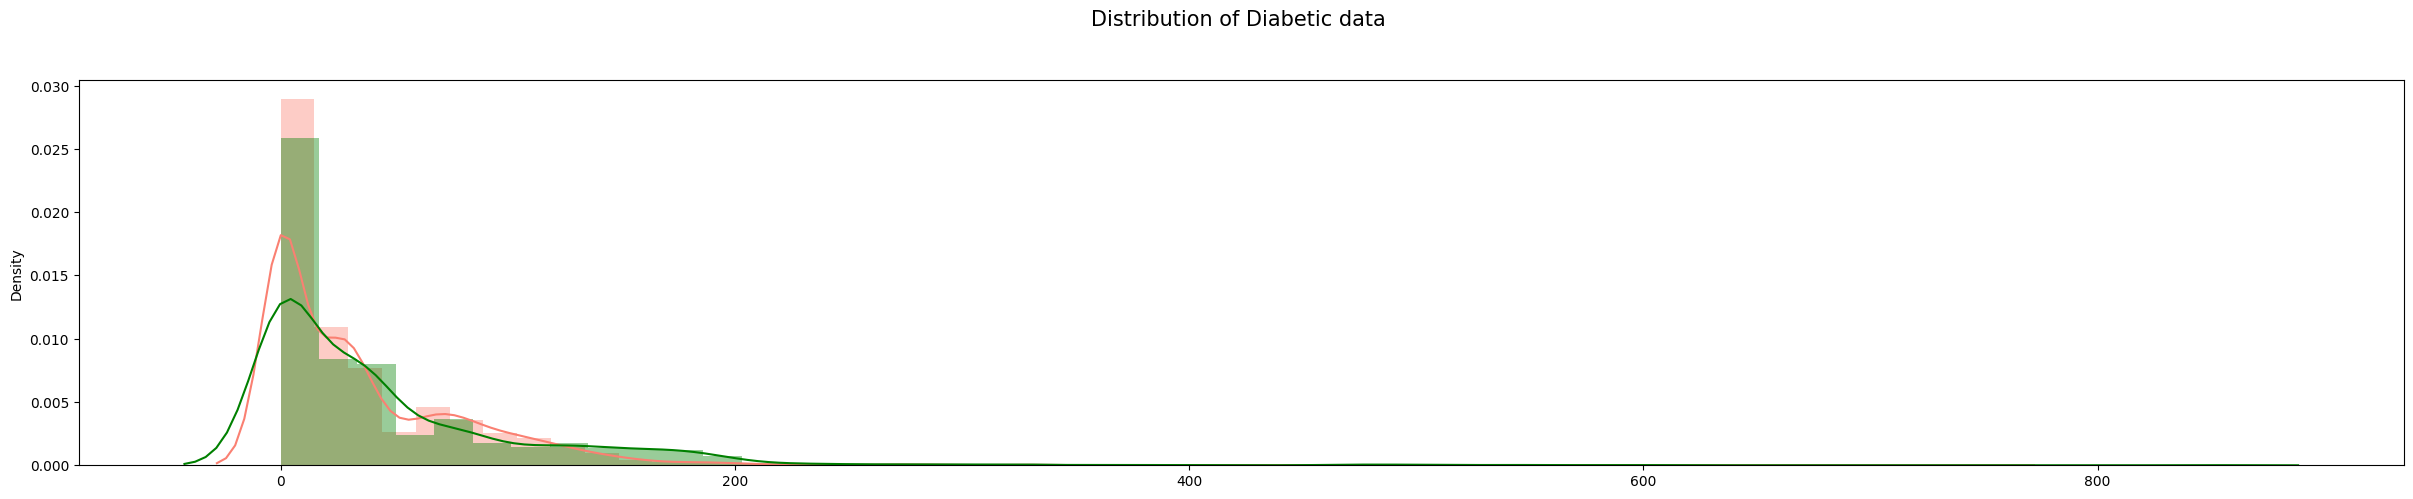

In [20]:
plt.figure(figsize=(30,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1],color='green')
plt.title('Distribution of Diabetic data \n\n ',fontsize= 15, family = 'DejaVu Sans')

Text(0.5, 1.0, 'Glucose vs DiabeticDetection \n\n ')

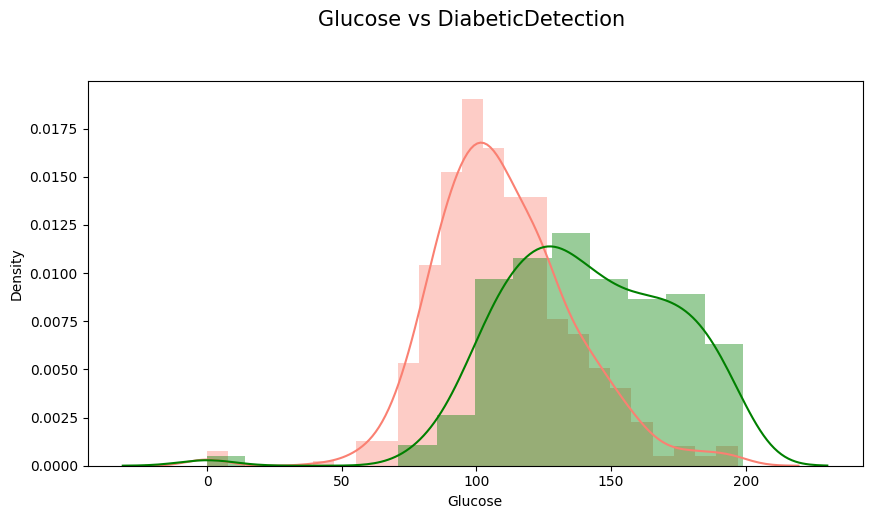

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0]['Glucose'],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1]['Glucose'],color='green')
plt.title('Glucose vs DiabeticDetection \n\n ',fontsize= 15, family = 'DejaVu Sans')

Text(0.5, 1.0, 'SkinThickness vs DiabeticDetection \n\n ')

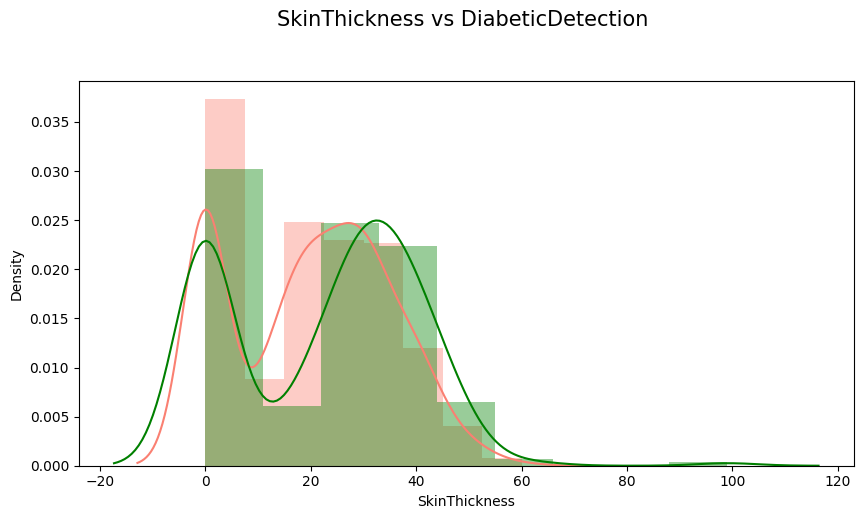

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0]['SkinThickness'],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1]['SkinThickness'],color='green')
plt.title('SkinThickness vs DiabeticDetection \n\n ',fontsize= 15, family = 'DejaVu Sans')

Text(0.5, 1.0, 'Insulin vs DiabeticDetection \n\n ')

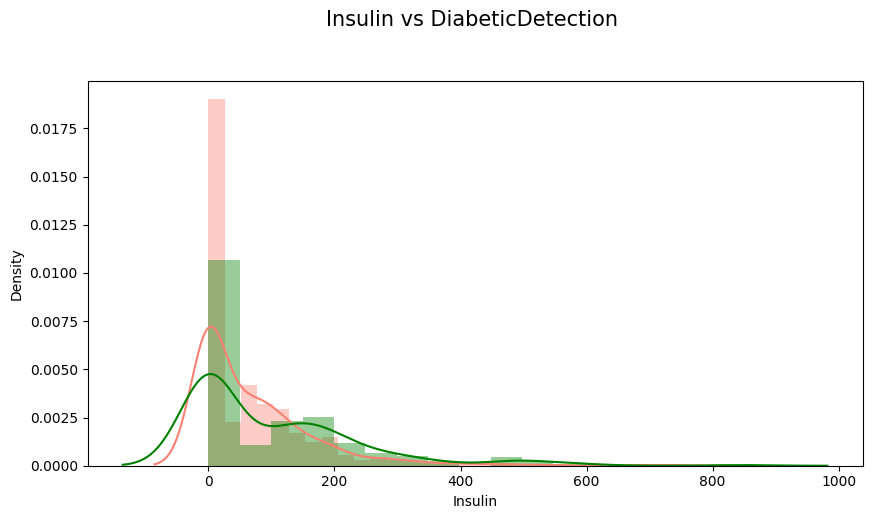

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0]['Insulin'],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1]['Insulin'],color='green')
plt.title('Insulin vs DiabeticDetection \n\n ',fontsize= 15, family = 'DejaVu Sans')

Text(0.5, 1.0, 'BMI vs DiabeticDetection \n\n ')

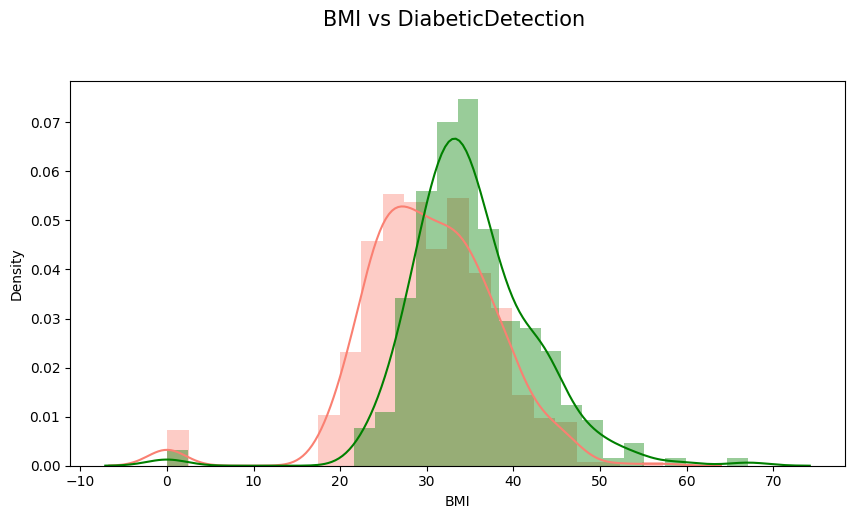

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0]['BMI'],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1]['BMI'],color='green')
plt.title('BMI vs DiabeticDetection \n\n ',fontsize= 15, family = 'DejaVu Sans')

Text(0.5, 1.0, 'Age vs DiabeticDetection \n\n ')

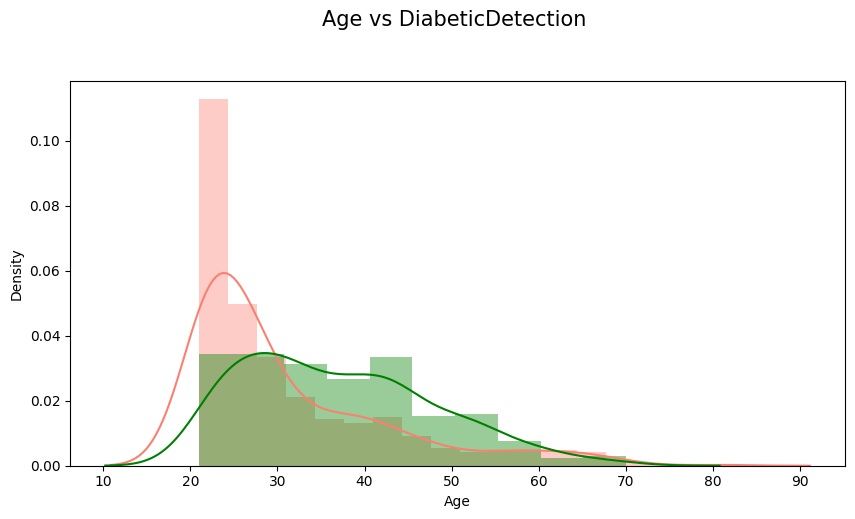

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0]['Age'],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1]['Age'],color='green')
plt.title('Age vs DiabeticDetection \n\n ',fontsize= 15, family = 'DejaVu Sans')

<Axes: xlabel='Age', ylabel='Pregnancies'>

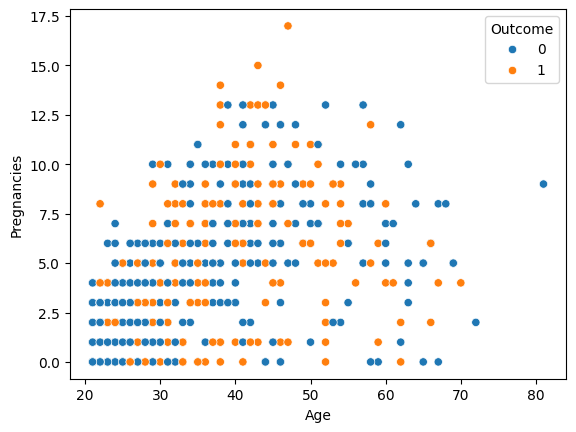

In [26]:
sns.scatterplot(x='Age',y='Pregnancies', data=diabetes_df, hue='Outcome')

In [27]:
#observation:
#Scatter plot shows the relation between age and pregnancies. We could also see some outliers in the plot.
#Most of the pregnancy has occured between the age 21-31.
#Maximum pregnancy count falls between 3-6.


<Axes: xlabel='Glucose', ylabel='Insulin'>

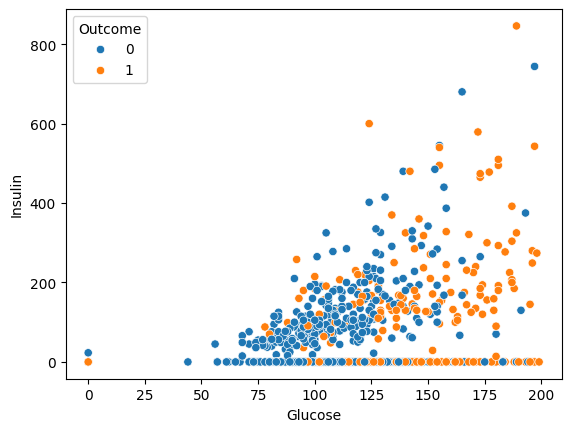

In [28]:
sns.scatterplot(x='Glucose',y='Insulin', data=diabetes_df, hue='Outcome')

<Axes: xlabel='SkinThickness', ylabel='BMI'>

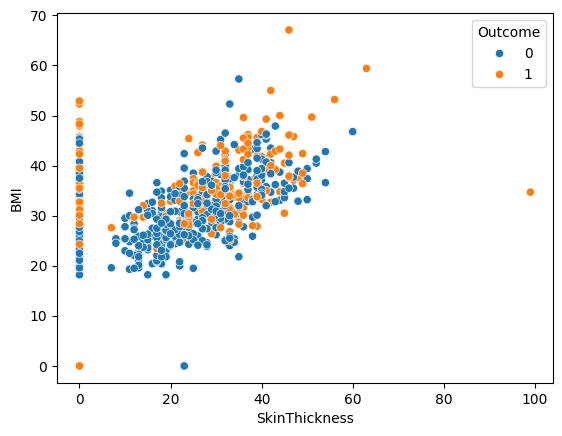

In [29]:
sns.scatterplot(x='SkinThickness',y='BMI', data=diabetes_df, hue='Outcome')

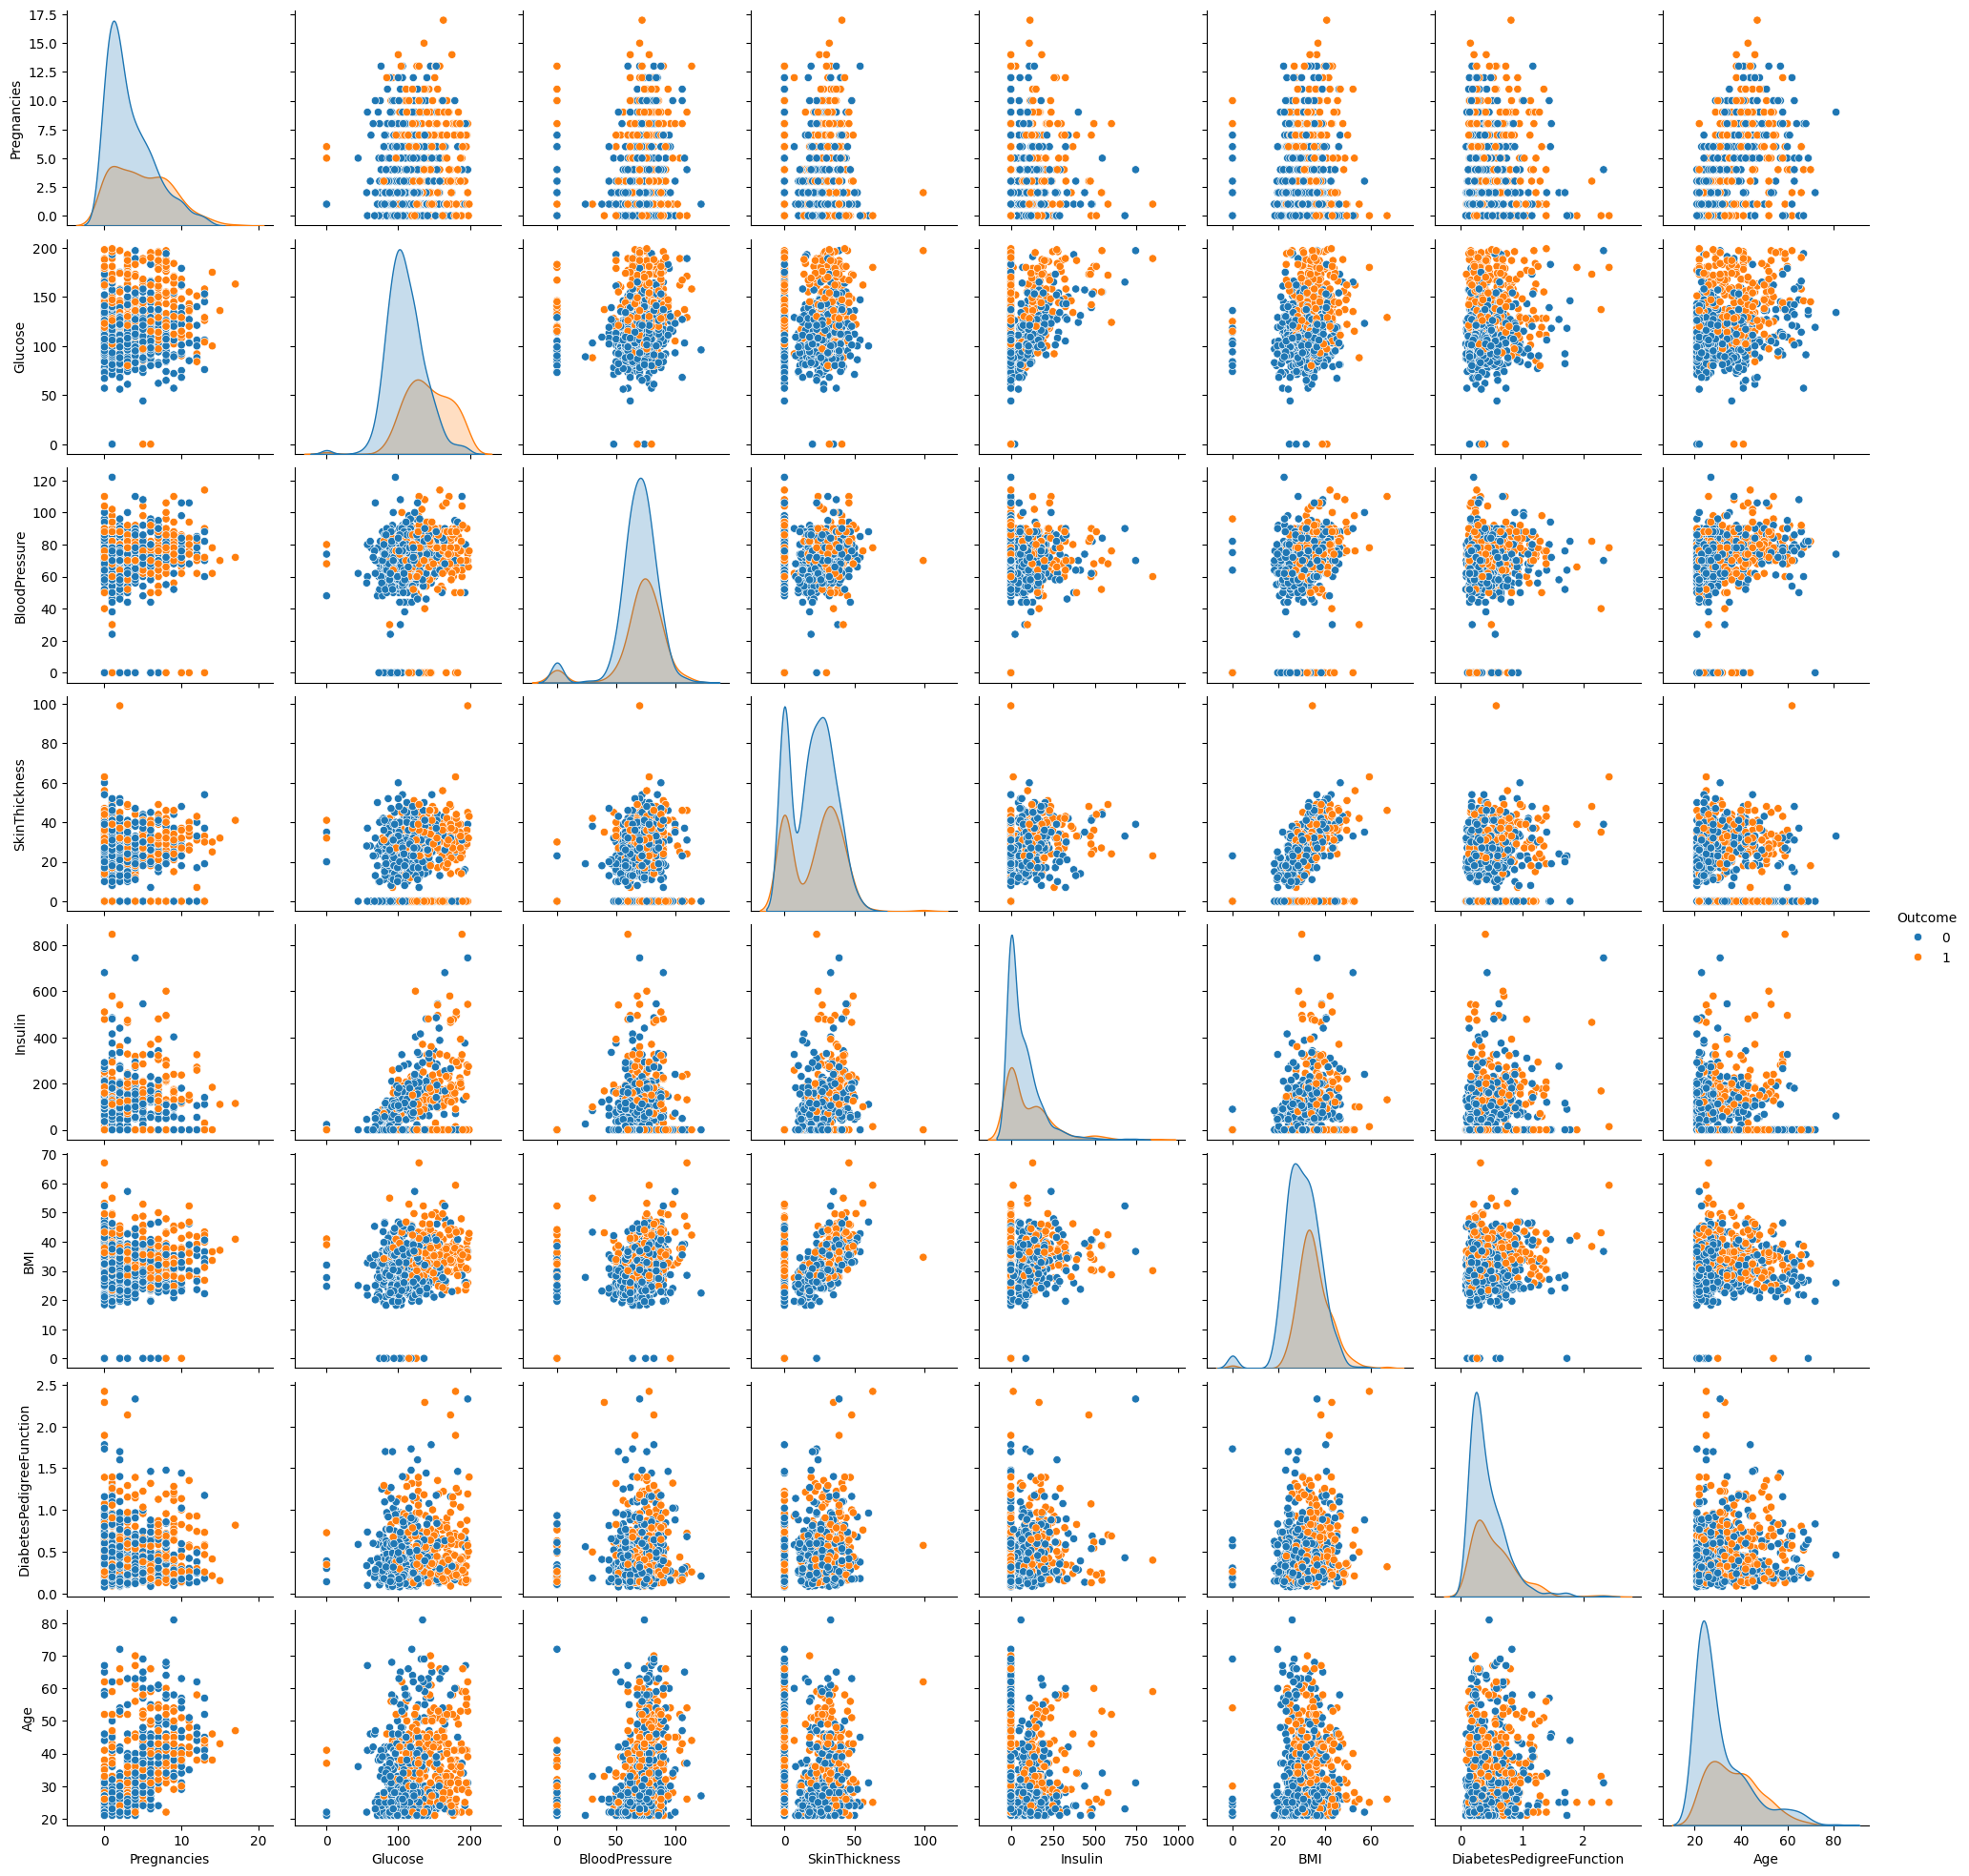

In [30]:
sns.pairplot(diabetes_df, diag_kind = 'kde', hue='Outcome')

# Feature Engineering
Treating Missing Values

In [31]:
cols = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

In [32]:
for i in cols:
    diabetes_df.loc[(diabetes_df[i] == 0),[i]] = np.nan

In [33]:
simpleImputer = SimpleImputer(missing_values=np.nan, strategy='median')
diabetes_df[cols] = simpleImputer.fit_transform(diabetes_df[cols])


# Histograms after treating missing values

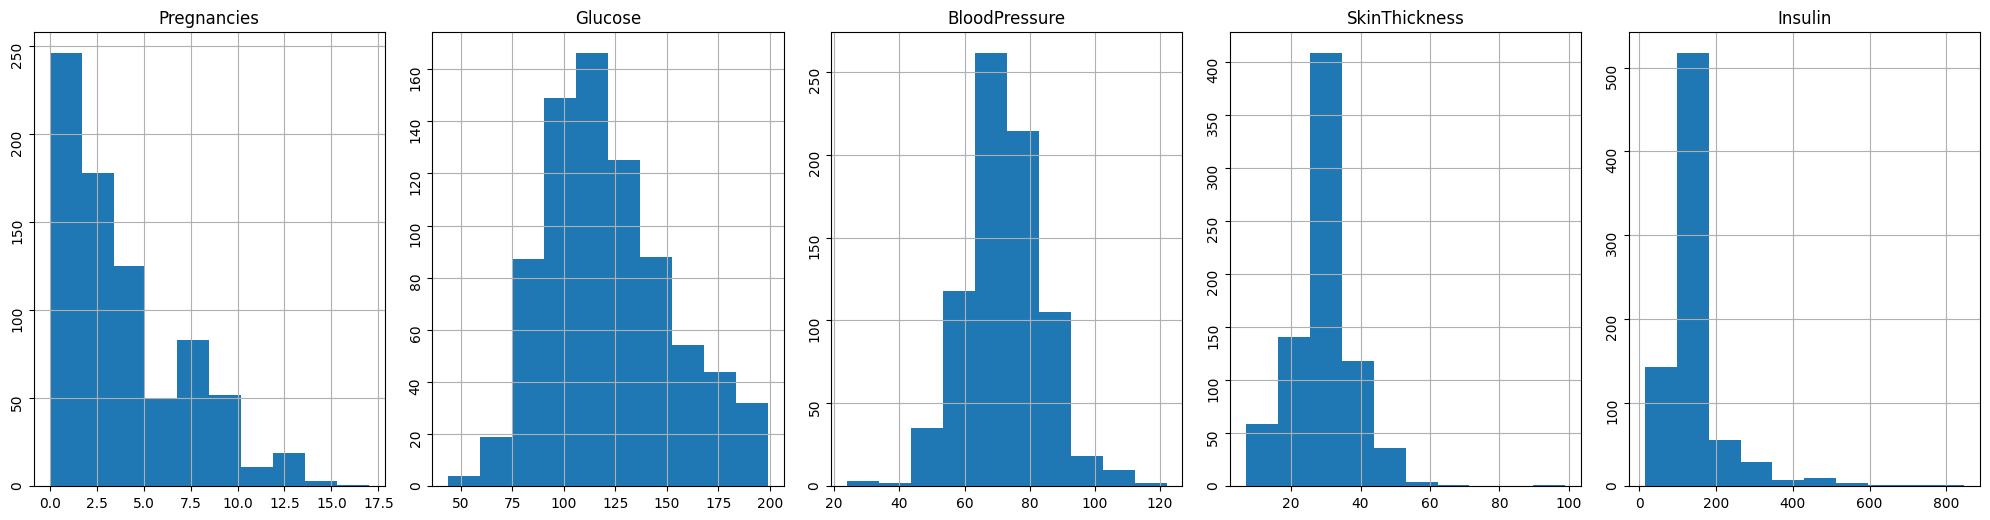

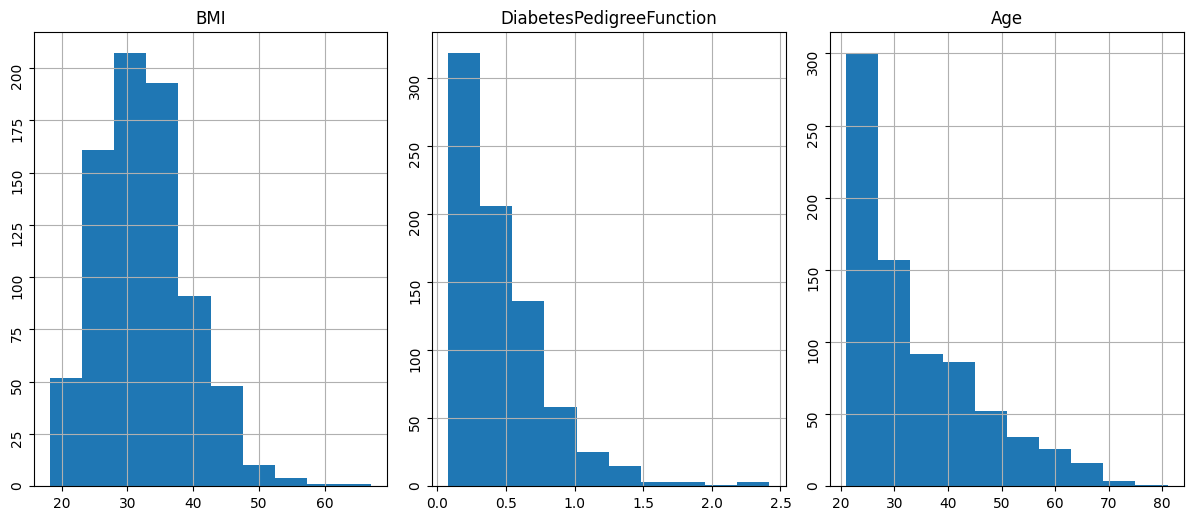

In [34]:
plotGraph(diabetes_df,'histogram')

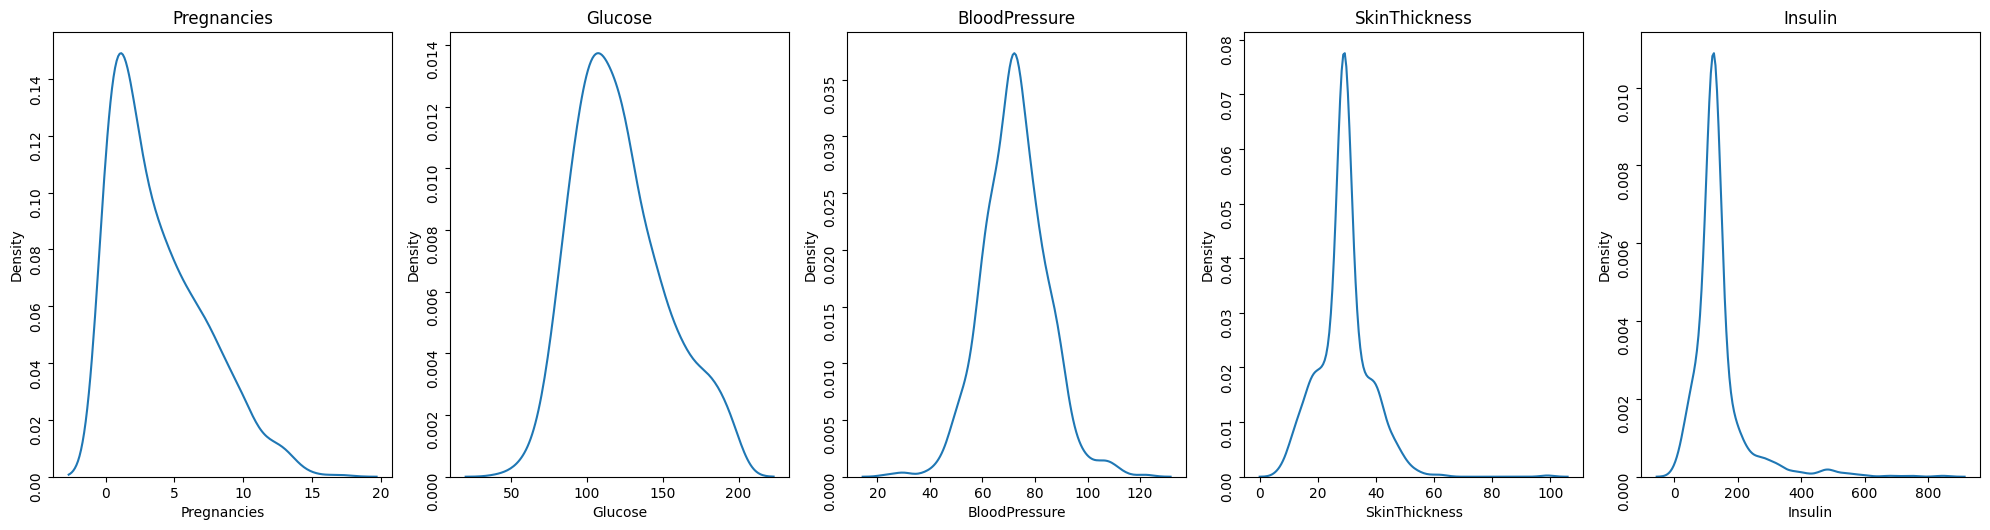

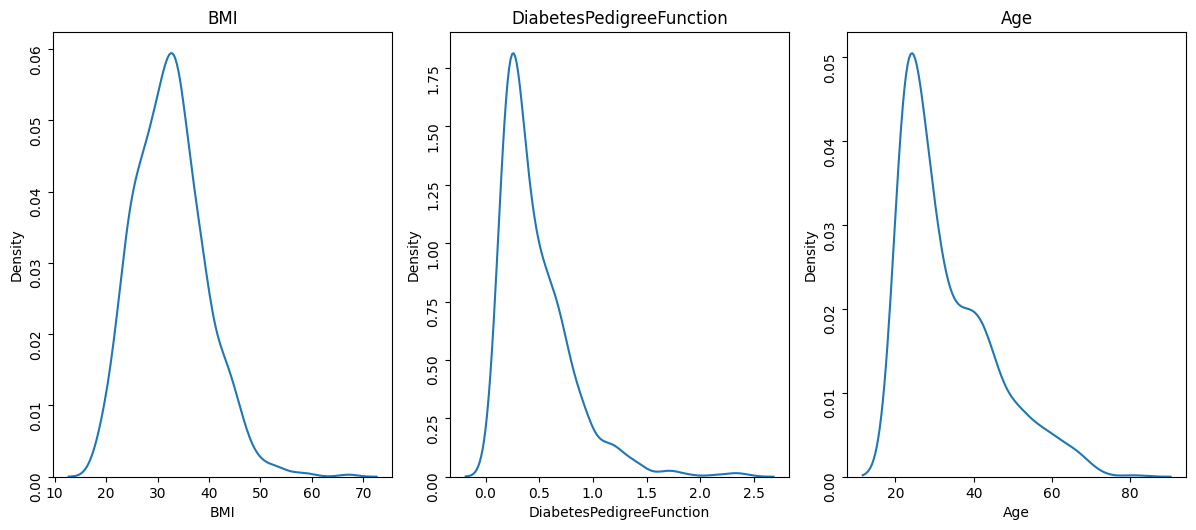

In [35]:
plotGraph(diabetes_df,'distplot')

# Outlier Detection and Treatment

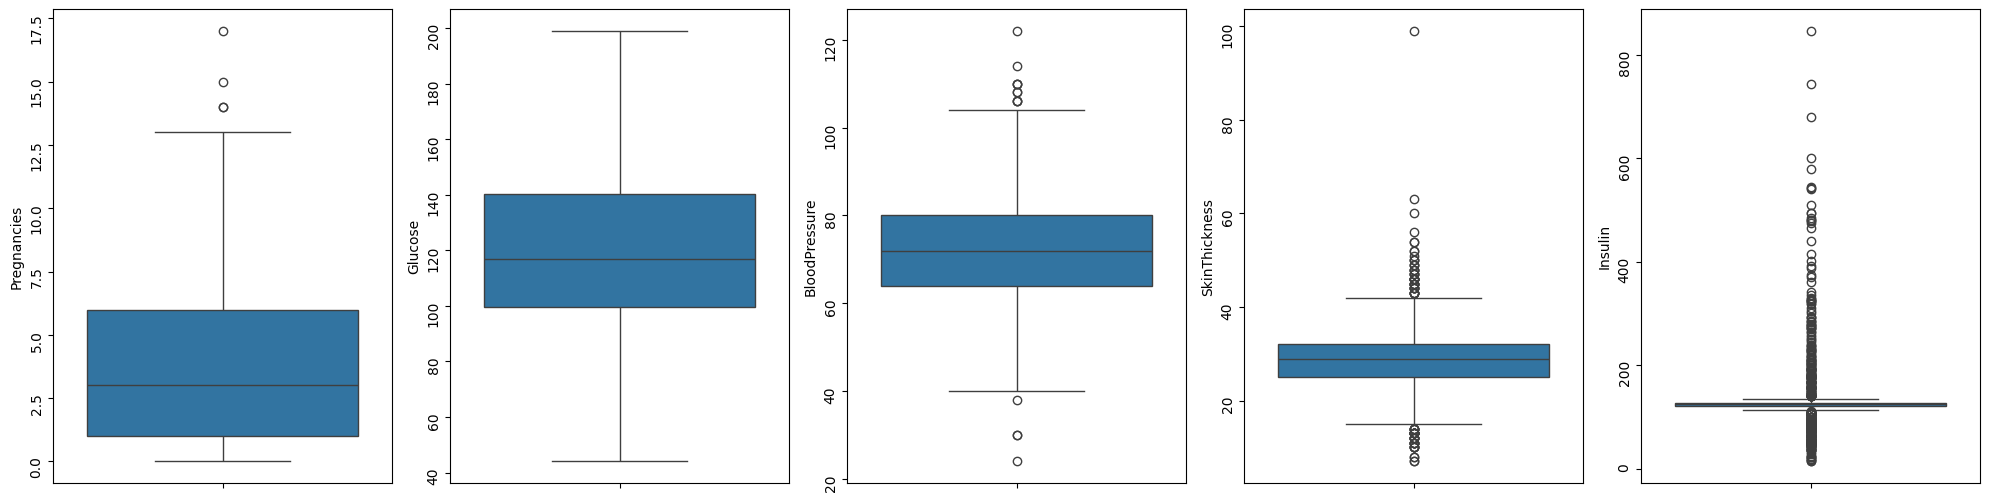

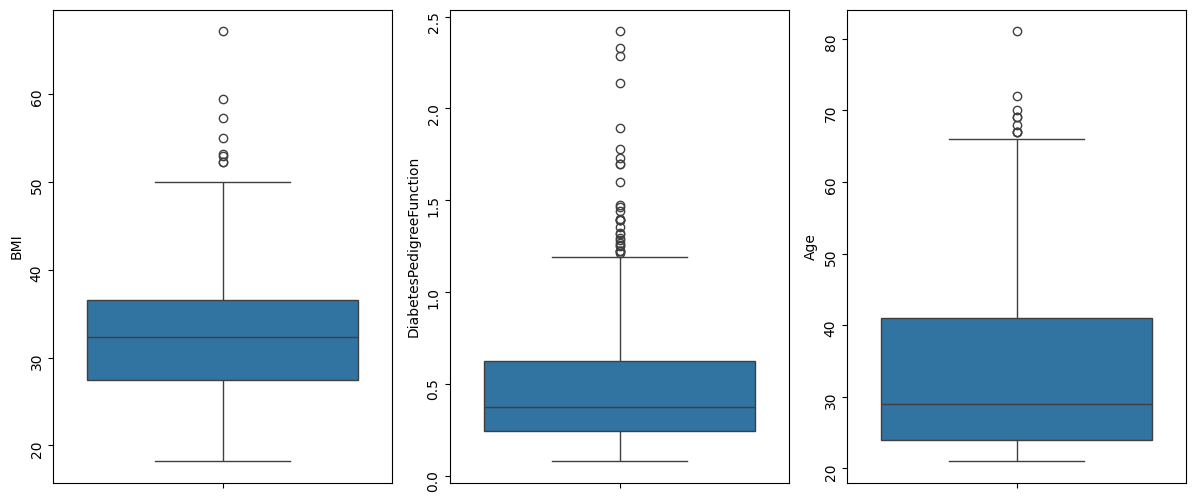

In [36]:
plotGraph(diabetes_df,'boxplot')


In [37]:
def detectOutlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3-q1
    lower_limit =  q1-1.5*IQR
    upper_limit = q3+1.5*IQR
    return lower_limit,upper_limit

In [38]:
outlierCols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin','DiabetesPedigreeFunction']

In [39]:
def treatOutliers(df,cols):
    for col in cols:
        lower, upper = detectOutlier(df,col)
        df.loc[df[col] < lower,col] = lower
        df.loc[df[col] > upper,col] = upper

In [40]:
treatOutliers(diabetes_df,outlierCols)

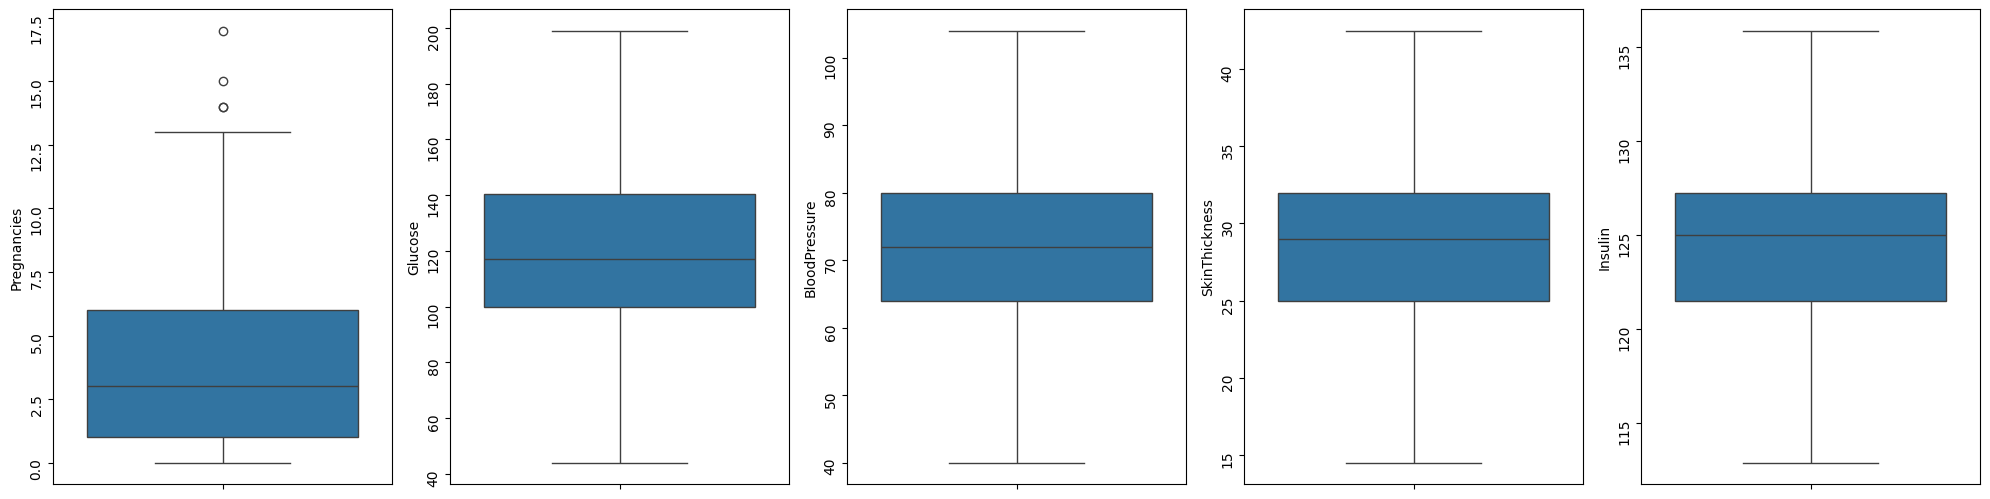

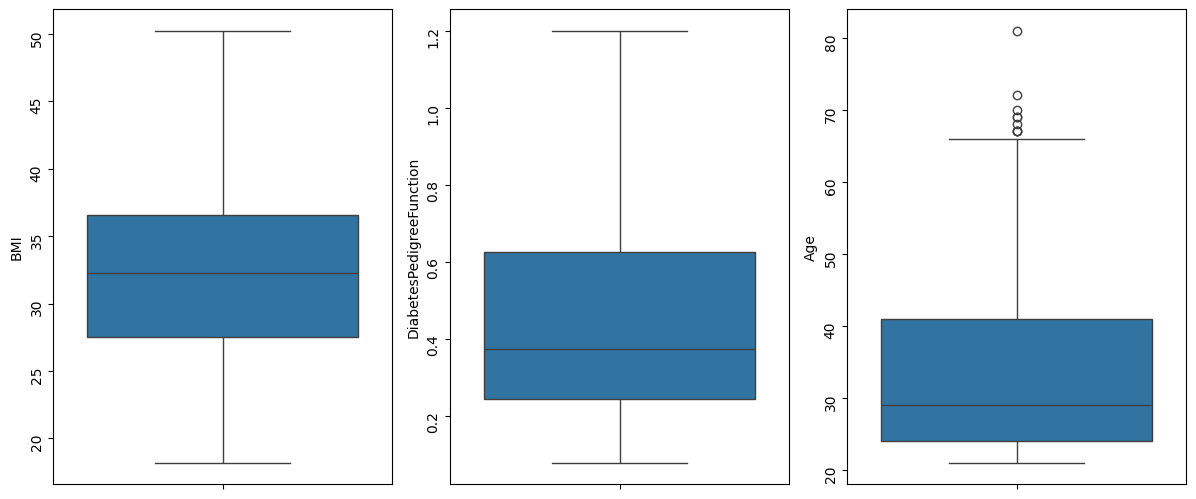

In [41]:
plotGraph(diabetes_df,'boxplot')

Text(0.5, 1.0, 'Distribution of Diabetic data \n\n ')

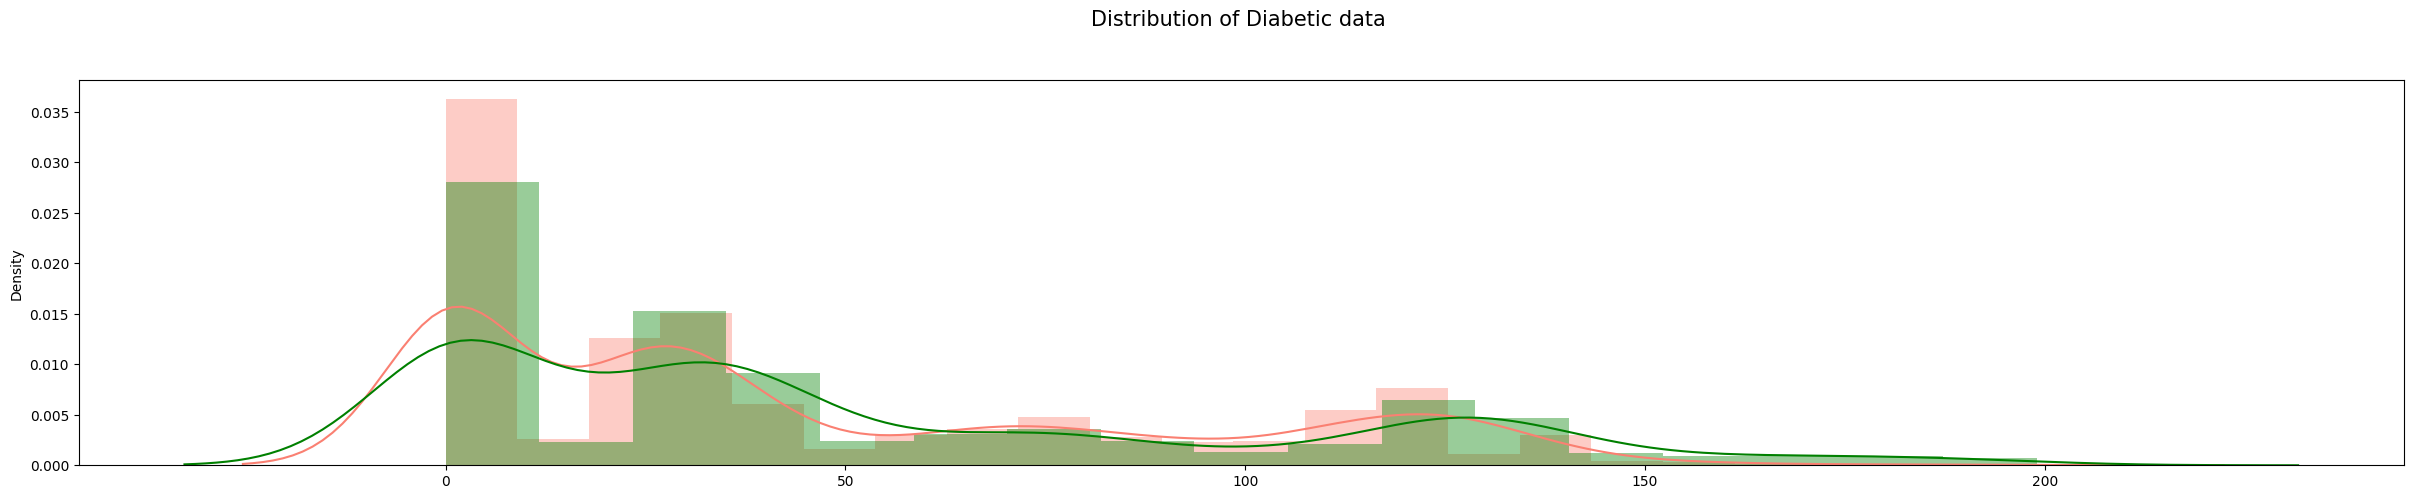

In [42]:
plt.figure(figsize=(30,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1],color='green')
plt.title('Distribution of Diabetic data \n\n ',fontsize= 15, family = 'DejaVu Sans')

Text(0.5, 1.0, 'Glucose vs DiabeticDetection \n\n ')

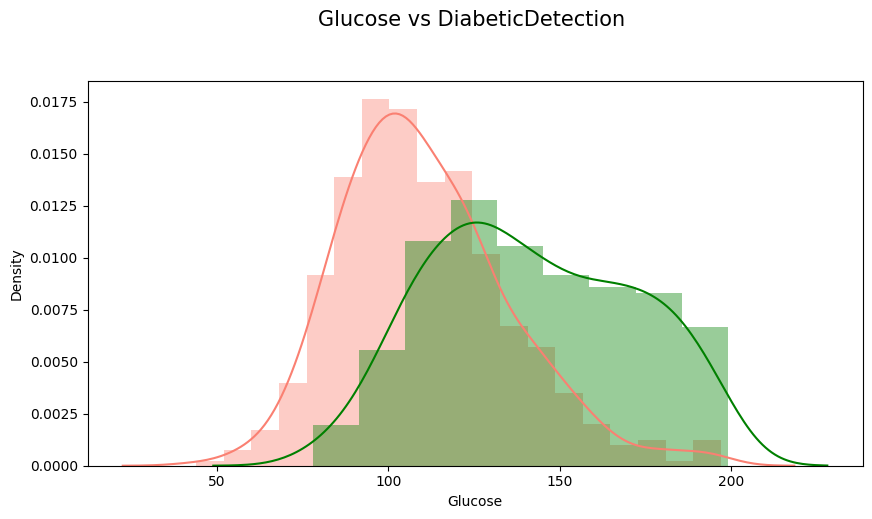

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0]['Glucose'],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1]['Glucose'],color='green')
plt.title('Glucose vs DiabeticDetection \n\n ',fontsize= 15, family = 'DejaVu Sans')

Text(0.5, 1.0, 'SkinThickness vs DiabeticDetection \n\n ')

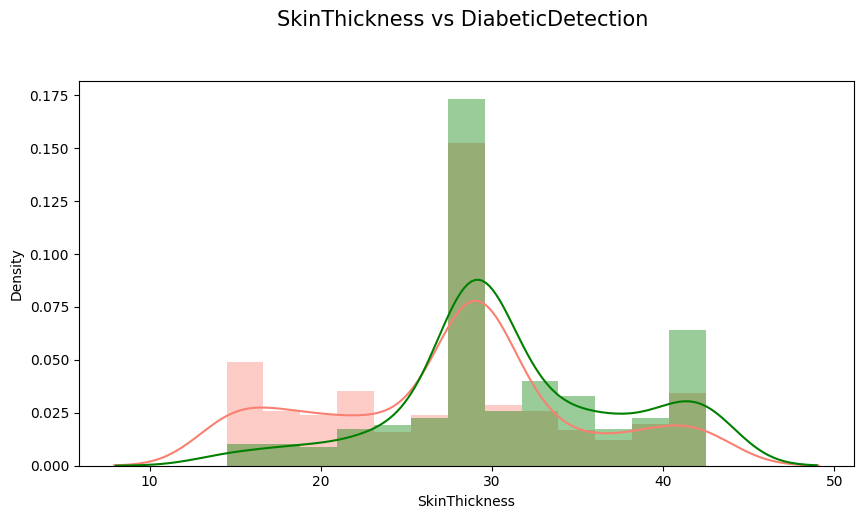

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0]['SkinThickness'],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1]['SkinThickness'],color='green')
plt.title('SkinThickness vs DiabeticDetection \n\n ',fontsize= 15, family = 'DejaVu Sans')

Text(0.5, 1.0, 'Insulin vs DiabeticDetection \n\n ')

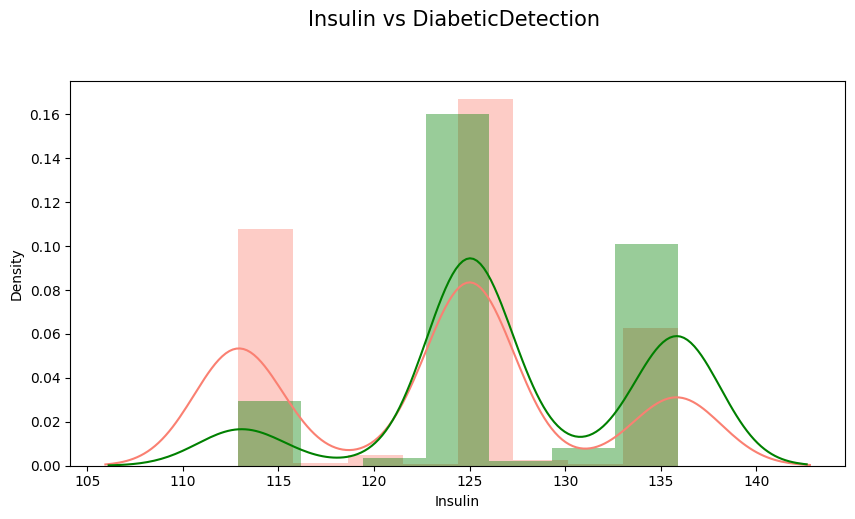

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0]['Insulin'],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1]['Insulin'],color='green')
plt.title('Insulin vs DiabeticDetection \n\n ',fontsize= 15, family = 'DejaVu Sans')

Text(0.5, 1.0, 'BMI vs DiabeticDetection \n\n ')

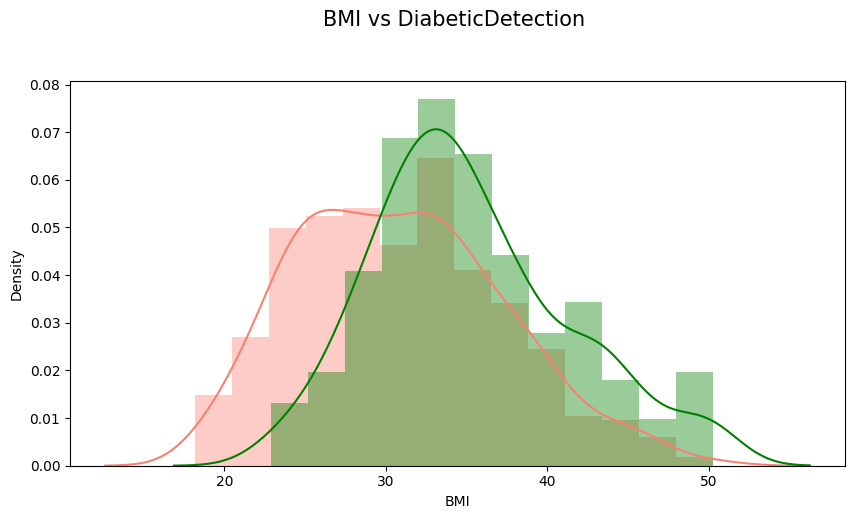

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0]['BMI'],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1]['BMI'],color='green')
plt.title('BMI vs DiabeticDetection \n\n ',fontsize= 15, family = 'DejaVu Sans')

Text(0.5, 1.0, 'Age vs DiabeticDetection \n\n ')

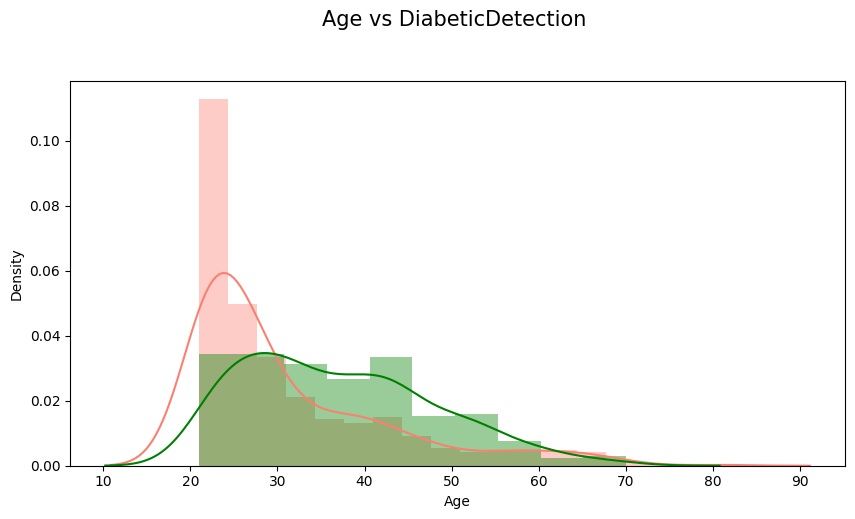

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(diabetes_df[diabetes_df.Outcome == 0]['Age'],color='salmon')
sns.distplot(diabetes_df[diabetes_df.Outcome == 1]['Age'],color='green')
plt.title('Age vs DiabeticDetection \n\n ',fontsize= 15, family = 'DejaVu Sans')

# Feature Selection


<Axes: >

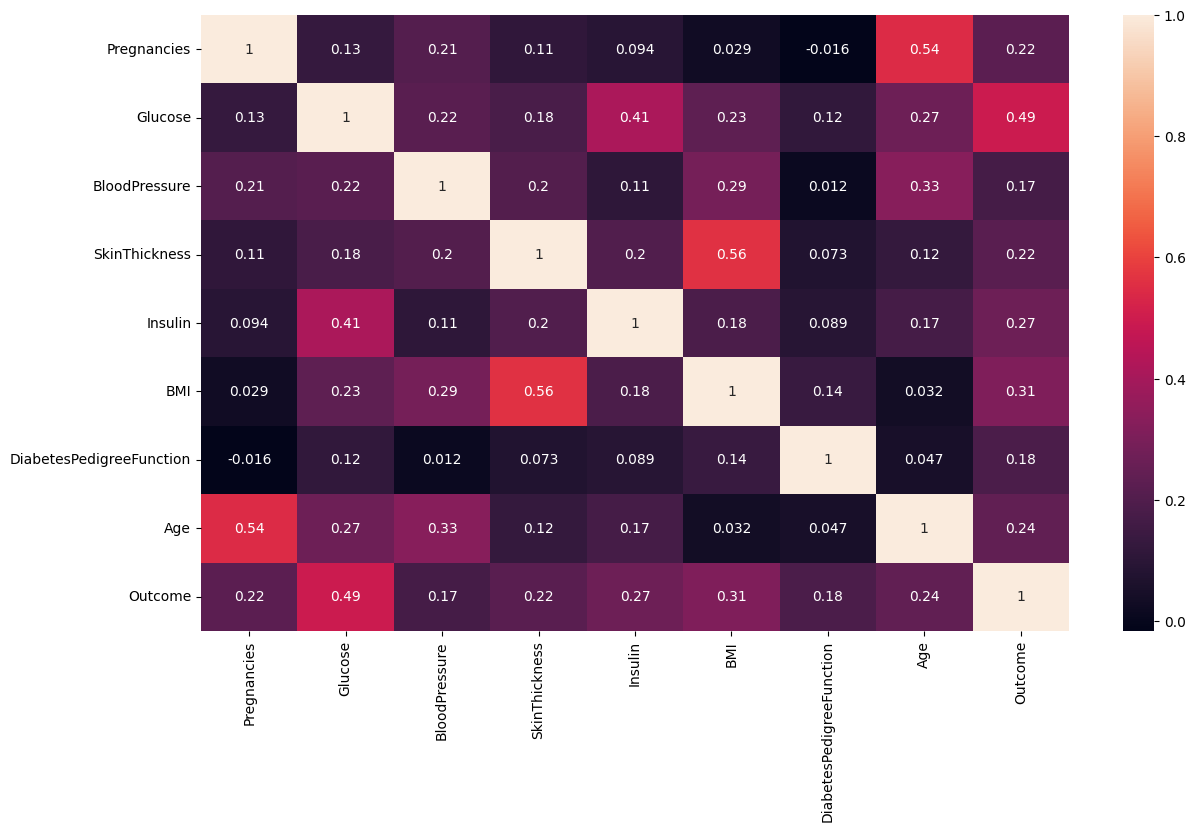

In [48]:
plt.figure(figsize=(14, 8))
sns.heatmap(diabetes_df.corr(), annot=True)

In [49]:
#observations:(keeping threshold as 0.2)
#Except for features BloodPressure and DiabetesPedigreeFunction all other features are correlated with output.
#We could also independent features having dependency on other features too
#like glucose is correlated with insulin, skinthickness is correlated with BMI.
#This shows that multicollinearity problem exists.

In [50]:
X = diabetes_df.drop(['Outcome'], axis=1)
Y = diabetes_df.Outcome

from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=7)
X_norm = StandardScaler().fit_transform(X)
rfe_selector.fit(X_norm, Y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

7 selected features


In [51]:
rfe_feature

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# Model Building

In [52]:
#Splitting the output and features seperately in y and x variable respectively

x = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df.Outcome

In [53]:
# Function to check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [54]:
#Function to build model and returns training and testing accuracy score, confusion matrix and classification report

def buildModel(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    train_accuracy = round(accuracy_score(y_train,train_pred),2)
    test_accuracy = round(accuracy_score(y_test,test_pred),2)
    confusion_Matrix = confusion_matrix(y_test,test_pred)
    classification_Report = classification_report(y_test,test_pred)
    return train_accuracy,test_accuracy,confusion_Matrix,classification_Report

In [55]:
#Function to plot Receiver Operating Characteristic and calculate ROC-AUC score

def plot_roc_curve(model, x_test,scatter = True):
    logit_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    print('ROC-AUC Score:'.upper(), round(logit_roc_auc*100),'%')
    print()
    plt.figure()
    #plt.figure(figsize = (5, 5))
    if scatter:
        sns.scatterplot(x = fpr, y = tpr)
    sns.lineplot(x = fpr, y = tpr)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', label = 'No Skill')
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    return round(logit_roc_auc*100)

In [56]:
#Gets the TP,FP,TN,FN values from confusion matrix

def get_Misclassified_Records(conf_matrix):
    TP, FP, FN, TN = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
    return (FP + FN)

# Train-Test Split

In [57]:
#Data is divided into training and testing set in the ratio 75:25

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
(576, 8)
(192, 8)
(576,)
(192,)

(576, 8)
(192, 8)
(576,)
(192,)


(192,)

# Standardisation

In [58]:
#Standardizing the data as it has both integer and float values

scaler =  StandardScaler()
num_cols = ['Pregnancies','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','BloodPressure']
scaler = scaler.fit(x_train[num_cols])
x_train[num_cols] = scaler.transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [59]:
#Standard scaler scales the values and brings the mean to 0 and std.deviation to 1

x_train.describe().T

count          mean       std       min       25%  \
Pregnancies               576.0 -3.700743e-17  1.000869 -1.157587 -0.855471   
Glucose                   576.0 -1.048544e-16  1.000869 -2.178957 -0.725319   
BloodPressure             576.0  2.898916e-16  1.000869 -2.726612 -0.682540   
SkinThickness             576.0  6.013708e-17  1.000869 -1.939485 -0.522989   
Insulin                   576.0 -7.709882e-18  1.000869 -1.471296 -0.578088   
BMI                       576.0  8.511710e-16  1.000869 -2.194877 -0.722037   
DiabetesPedigreeFunction  576.0 -1.233581e-17  1.000869 -1.328916 -0.768161   
Age                       576.0 -1.942890e-16  1.000869 -1.056286 -0.803514   

                               50%       75%       max  
Pregnancies              -0.251239  0.655109  3.978385  
Glucose                  -0.152171  0.645254  2.572362  
BloodPressure            -0.001183  0.680174  2.724246  
SkinThickness             0.016629  0.421342  1.837838  
Insulin                   0.048725  0.581516  1.412042  
BMI                      -0.016301  0.616560  2.722261  
DiabetesPedigreeFunction -0.288876  0.620293  2.540033  
Age                      -0.297972  0.628856  3.999140

# Multicollinearity Check

In [60]:
calculateVIF(x_train)


Features   VIF
5                       BMI  1.59
7                       Age  1.59
3             SkinThickness  1.49
0               Pregnancies  1.40
1                   Glucose  1.35
4                   Insulin  1.25
2             BloodPressure  1.23
6  DiabetesPedigreeFunction  1.04

In [61]:
testingScores = []
trainingScores = []
no_of_MisclassifiedRecords = []
modelNames = []
models = []
roc_scores = []

#7 algorithms are used to build 7 different models. Each model will display its

1. Training accuracy score
2. Testing accuracy score
3. Confusion matrix
4. Classification Report
5. ROC-AUC Score and graph

Depending on their performances the best model will be selected.

# 1)Logistic Regression


Training Accuracy Score: 0.79
Testing Accuracy Score: 0.73

------- Confusion Matrix -------
[[105  20]
 [ 32  35]]


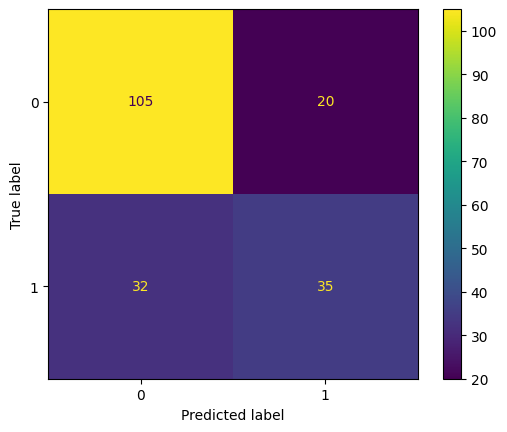


------- Classification Report -------
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.52      0.57        67

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.72      0.73      0.72       192


------- ROC & AUC -------
ROC-AUC SCORE: 82 %



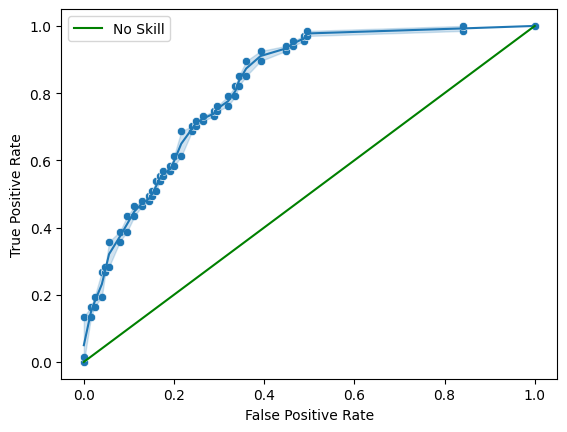

In [62]:
lr = LogisticRegression(solver='saga', penalty = 'l1')
lr_train_AS,lr_test_AS,lr_confusionMatrix,lr_classificationReport = buildModel(lr,x_train,y_train,x_test,y_test)
print('Training Accuracy Score:',lr_train_AS)
print('Testing Accuracy Score:',lr_test_AS)
print()
print('------- Confusion Matrix -------')
print(lr_confusionMatrix)
ConfusionMatrixDisplay(lr_confusionMatrix).plot()
plt.show()
lr_MR = get_Misclassified_Records(lr_confusionMatrix)
print()
print('------- Classification Report -------')
print(lr_classificationReport)
print()
print('------- ROC & AUC -------')
lr_roc_score = plot_roc_curve(lr,x_test)

trainingScores.append(lr_train_AS)
testingScores.append(lr_test_AS)
no_of_MisclassifiedRecords.append(lr_MR)
modelNames.append('LR')
roc_scores.append(lr_roc_score)

# 2)kneighbour classifier

Training Accuracy Score: 0.82
Testing Accuracy Score: 0.78

------- Confusion Matrix -------


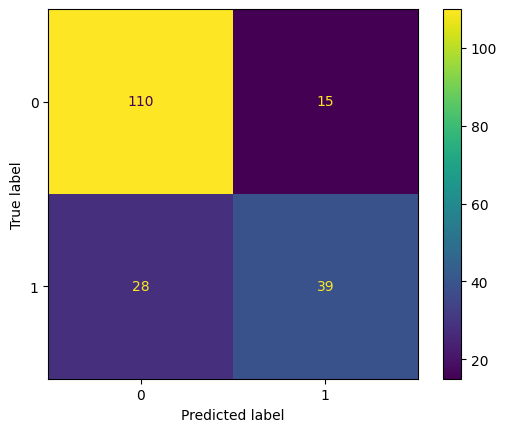


------- Classification Report -------
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.72      0.58      0.64        67

    accuracy                           0.78       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192


ROC-AUC SCORE: 80 %



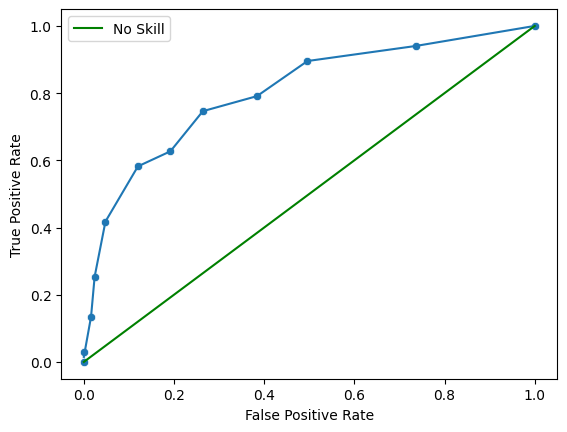

In [63]:
knc = KNeighborsClassifier(n_neighbors = 11, leaf_size=1, p=1)
knc_train_AS,knc_test_AS,knc_confusionMatrix,knc_classificationReport = buildModel(knc,x_train,y_train,x_test,y_test)
print('Training Accuracy Score:',knc_train_AS)
print('Testing Accuracy Score:',knc_test_AS)
print()
print('------- Confusion Matrix -------')
ConfusionMatrixDisplay(knc_confusionMatrix).plot()
plt.show()
knc_MR = get_Misclassified_Records(knc_confusionMatrix)
print()
print('------- Classification Report -------')
print(knc_classificationReport)
print()
knc_roc_score = plot_roc_curve(knc,x_test)

trainingScores.append(knc_train_AS)
testingScores.append(knc_test_AS)
no_of_MisclassifiedRecords.append(knc_MR)
modelNames.append('KNC')
roc_scores.append(knc_roc_score)

# 3)Support Vector Classifier

Training Accuracy Score: 0.68
Testing Accuracy Score: 0.7

------- Confusion Matrix -------


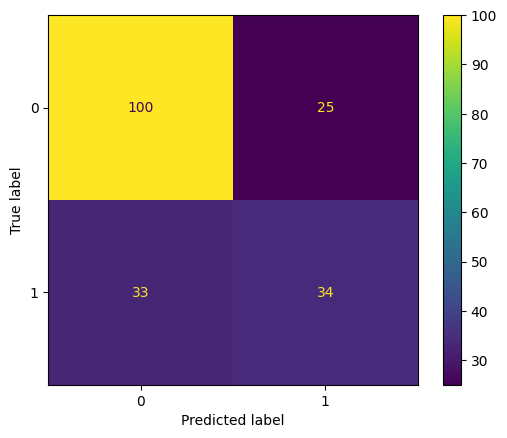


------- Classification Report -------
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       125
           1       0.58      0.51      0.54        67

    accuracy                           0.70       192
   macro avg       0.66      0.65      0.66       192
weighted avg       0.69      0.70      0.69       192


ROC-AUC SCORE: 74 %



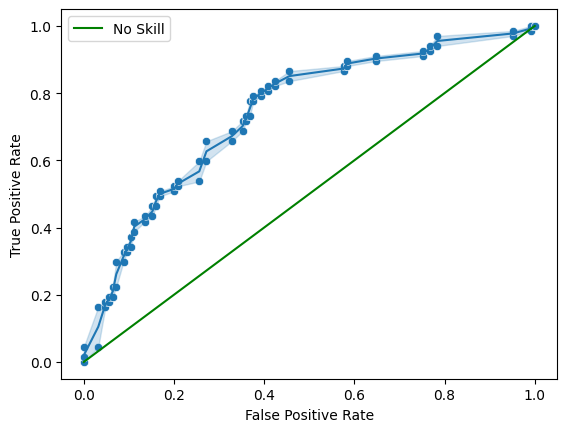

In [64]:
svc = SVC(kernel='sigmoid',probability=True,C=9)
svc_train_AS,svc_test_AS,svc_confusionMatrix,svc_classificationReport = buildModel(svc,x_train,y_train,x_test,y_test)
print('Training Accuracy Score:',svc_train_AS)
print('Testing Accuracy Score:',svc_test_AS)
print()
print('------- Confusion Matrix -------')
ConfusionMatrixDisplay(svc_confusionMatrix).plot()
plt.show()
svc_MR = get_Misclassified_Records(svc_confusionMatrix)
print()
print('------- Classification Report -------')
print(svc_classificationReport)
print()
svc_roc_score = plot_roc_curve(svc,x_test)

trainingScores.append(svc_train_AS)
testingScores.append(svc_test_AS)
no_of_MisclassifiedRecords.append(svc_MR)
modelNames.append('SVC')
roc_scores.append(svc_roc_score)

# 4) Naive Bayes Classifier


Training Accuracy Score: 0.77
Testing Accuracy Score: 0.72

------- Confusion Matrix -------


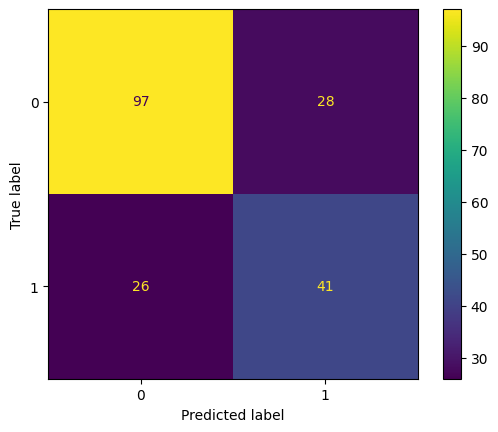


------- Classification Report -------
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       125
           1       0.59      0.61      0.60        67

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192


ROC-AUC SCORE: 81 %



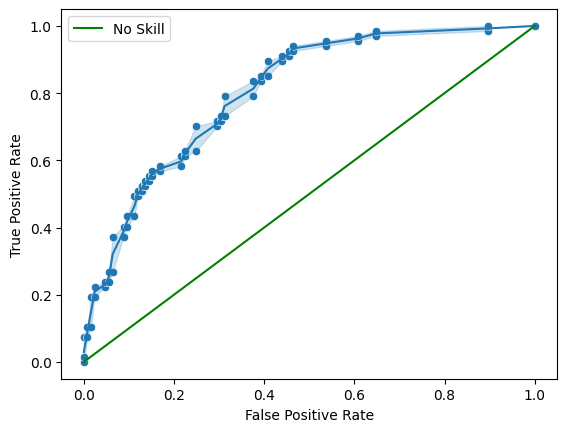

In [65]:
gnb = GaussianNB()
gnb_train_AS,gnb_test_AS,gnb_confusionMatrix,gnb_classificationReport = buildModel(gnb,x_train,y_train,x_test,y_test)
print('Training Accuracy Score:',gnb_train_AS)
print('Testing Accuracy Score:',gnb_test_AS)
print()
print('------- Confusion Matrix -------')
ConfusionMatrixDisplay(gnb_confusionMatrix).plot()
plt.show()
gnb_MR = get_Misclassified_Records(gnb_confusionMatrix)
print()
print('------- Classification Report -------')
print(gnb_classificationReport)
print()
gnb_roc_score = plot_roc_curve(gnb,x_test)

trainingScores.append(gnb_train_AS)
testingScores.append(gnb_test_AS)
no_of_MisclassifiedRecords.append(gnb_MR)
modelNames.append('NB')
roc_scores.append(gnb_roc_score)

Training Accuracy Score: 0.77
Testing Accuracy Score: 0.72

------- Confusion Matrix -------


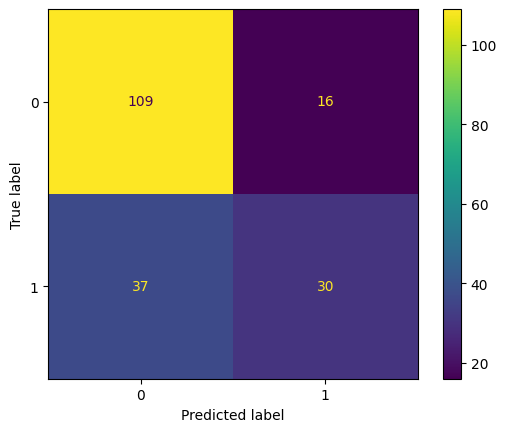


------- Classification Report -------
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       125
           1       0.65      0.45      0.53        67

    accuracy                           0.72       192
   macro avg       0.70      0.66      0.67       192
weighted avg       0.71      0.72      0.71       192


ROC-AUC SCORE: 73 %



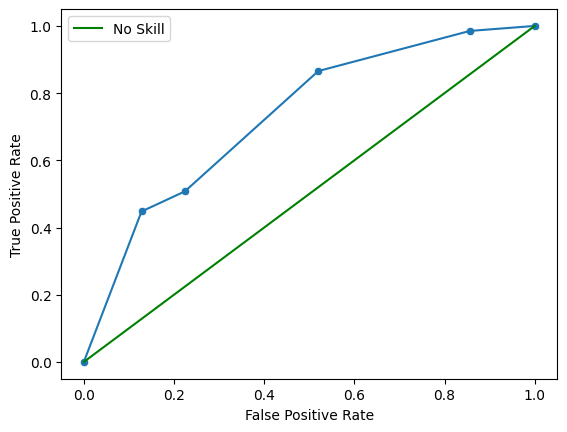

In [66]:
dt = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=3,
                       max_features='auto', random_state=1024)

dt_train_AS,dt_test_AS,dt_confusionMatrix,dt_classificationReport = buildModel(dt,x_train,y_train,x_test,y_test)

print('Training Accuracy Score:',dt_train_AS)
print('Testing Accuracy Score:',dt_test_AS)
print()
print('------- Confusion Matrix -------')
ConfusionMatrixDisplay(dt_confusionMatrix).plot()
plt.show()
dt_MR = get_Misclassified_Records(dt_confusionMatrix)
print()
print('------- Classification Report -------')
print(dt_classificationReport)
print()
dt_roc_score = plot_roc_curve(dt,x_test)

trainingScores.append(dt_train_AS)
testingScores.append(dt_test_AS)
no_of_MisclassifiedRecords.append(dt_MR)
modelNames.append('DT')
roc_scores.append(dt_roc_score)

# Random Forest Classifier

Training Accuracy Score: 0.77
Testing Accuracy Score: 0.7

------- Confusion Matrix -------


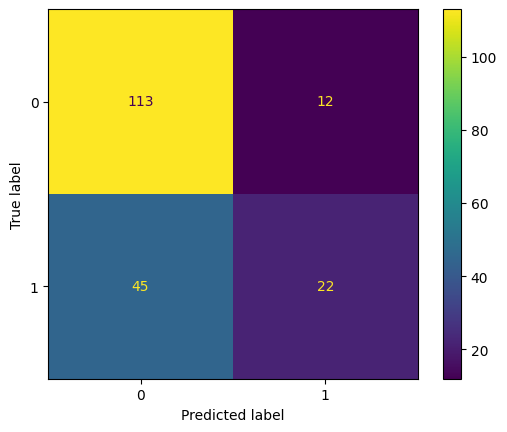


------- Classification Report -------
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       125
           1       0.65      0.33      0.44        67

    accuracy                           0.70       192
   macro avg       0.68      0.62      0.62       192
weighted avg       0.69      0.70      0.67       192


ROC-AUC SCORE: 81 %



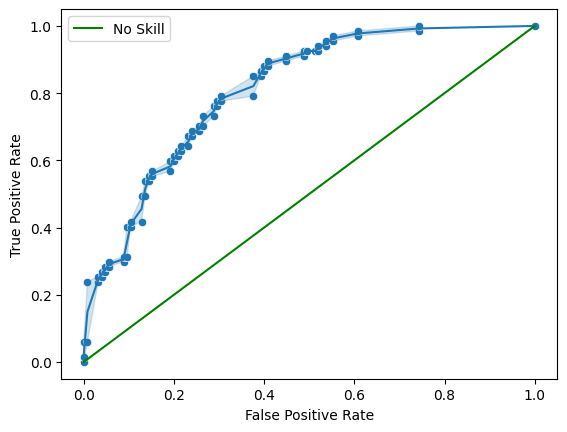

In [67]:
rfc  = RandomForestClassifier(criterion='entropy', max_depth=2)

rfc_train_AS,rfc_test_AS,rfc_confusionMatrix,rfc_classificationReport = buildModel(rfc,x_train,y_train,x_test,y_test)

print('Training Accuracy Score:',rfc_train_AS)
print('Testing Accuracy Score:',rfc_test_AS)
print()
print('------- Confusion Matrix -------')
ConfusionMatrixDisplay(rfc_confusionMatrix).plot()
plt.show()
rfc_MR = get_Misclassified_Records(rfc_confusionMatrix)
print()
print('------- Classification Report -------')
print(rfc_classificationReport)
print()
rfc_roc_score = plot_roc_curve(rfc,x_test)

trainingScores.append(rfc_train_AS)
testingScores.append(rfc_test_AS)
no_of_MisclassifiedRecords.append(rfc_MR)
modelNames.append('RF')
roc_scores.append(rfc_roc_score)

# Gradient Boosting Classifier

Training Accuracy Score: 0.75
Testing Accuracy Score: 0.72

------- Confusion Matrix -------


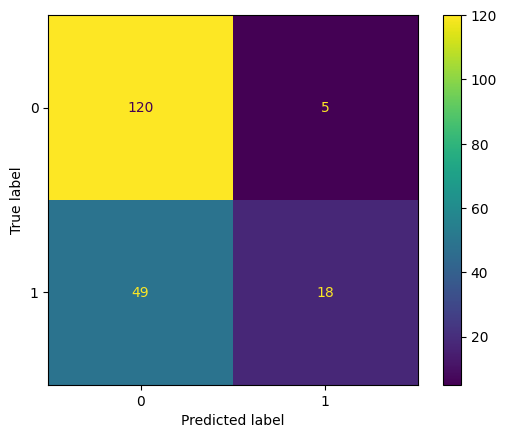


------- Classification Report -------
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       125
           1       0.78      0.27      0.40        67

    accuracy                           0.72       192
   macro avg       0.75      0.61      0.61       192
weighted avg       0.74      0.72      0.67       192


ROC-AUC SCORE: 79 %



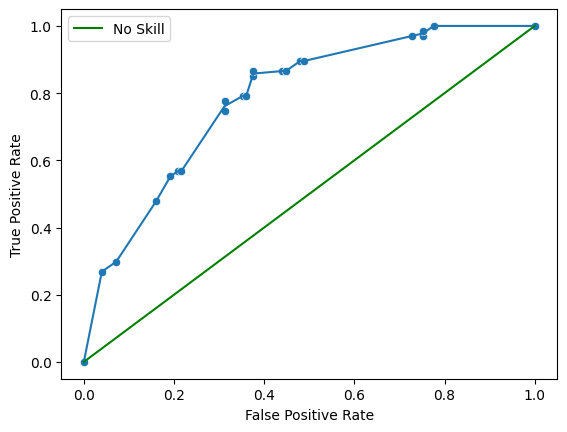

In [68]:
gbc  = GradientBoostingClassifier(max_depth=2,learning_rate=0.01,n_estimators=45)

gbc_train_AS,gbc_test_AS,gbc_confusionMatrix,gbc_classificationReport = buildModel(gbc,x_train,y_train,x_test,y_test)

print('Training Accuracy Score:',gbc_train_AS)
print('Testing Accuracy Score:',gbc_test_AS)
print()
print('------- Confusion Matrix -------')
ConfusionMatrixDisplay(gbc_confusionMatrix).plot()
plt.show()
gbc_MR = get_Misclassified_Records(gbc_confusionMatrix)
print()
print('------- Classification Report -------')
print(gbc_classificationReport)
print()
gbc_roc_score = plot_roc_curve(gbc,x_test)

trainingScores.append(gbc_train_AS)
testingScores.append(gbc_test_AS)
no_of_MisclassifiedRecords.append(gbc_MR)
modelNames.append('GBC')
roc_scores.append(gbc_roc_score)

In [69]:
models_ML_df = pd.DataFrame({'Model Name' : modelNames,
                             'Training Score' : trainingScores,
                             'Testing Score' : testingScores,
                             'No.of Misclassified Records' : no_of_MisclassifiedRecords,
                             'ROC-AUC Score' : roc_scores})
print(models_ML_df)

  Model Name  Training Score  Testing Score  No.of Misclassified Records  \
0         LR            0.79           0.73                           52   
1        KNC            0.82           0.78                           43   
2        SVC            0.68           0.70                           58   
3         NB            0.77           0.72                           54   
4         DT            0.77           0.72                           53   
5         RF            0.77           0.70                           57   
6        GBC            0.75           0.72                           54   

   ROC-AUC Score  
0             82  
1             80  
2             74  
3             81  
4             73  
5             81  
6             79  


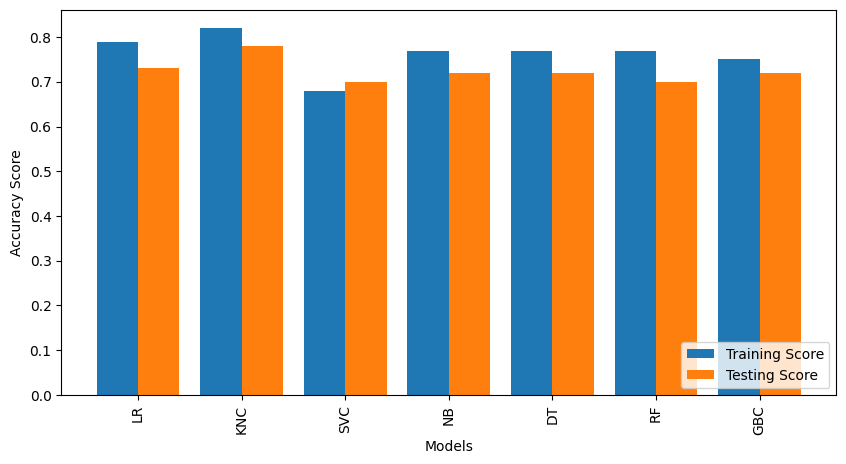

In [70]:
plt.figure(figsize=(10,5))
X_axis = np.arange(len(models_ML_df['Model Name']))
plt.bar(X_axis - 0.2, models_ML_df['Training Score'], 0.4, label = 'Training Score')
plt.bar(X_axis + 0.2, models_ML_df['Testing Score'], 0.4, label = 'Testing Score')


plt.xticks(X_axis, models_ML_df['Model Name'],rotation=90)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.legend(loc = 'lower right')
plt.show()

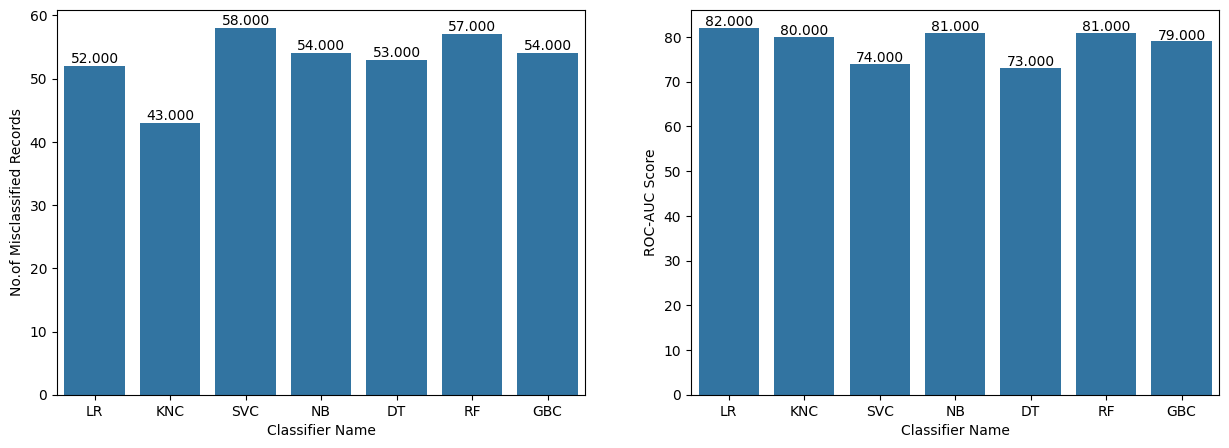

In [71]:
f,axes = plt.subplots(1,2, figsize = (15,5))
sns.barplot(x = 'Model Name', y = 'No.of Misclassified Records', data = models_ML_df, ax=axes[0])
sns.barplot(x = 'Model Name', y = 'ROC-AUC Score', data = models_ML_df, ax=axes[1])
axes[0].set(xlabel='Classifier Name', ylabel='No.of Misclassified Records')
axes[1].set(xlabel='Classifier Name', ylabel='ROC-AUC Score')

for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width()/2, height + 0.5, '{:1.3f}'.format(height), ha="center")

for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width()/2, height + 0.5, '{:1.3f}'.format(height), ha="center")

plt.show()

In [72]:
#Observation:
#Based on the bar plots plotted "K NEAREST NEIGHBORS CLASSIFIER" is performing best out of the 7 models.
#1. It has the best training and testing accuracy score (0.82 and 0.78) respectively.
#2. No.of misclassified records are low out of all the 7 models (43 records are misclassified).


# Cross-validation

In [73]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SVC', SVC(kernel='linear', probability=True)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=30)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy', max_depth=3)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(criterion='entropy', max_depth=3)))
models.append(('GB', GradientBoostingClassifier(max_depth=2)))
models.append(('AB', AdaBoostClassifier()))

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10)
    score = round(cross_val_score(model, x, y, cv=kfold, scoring='accuracy').mean(),2)
    names.append(name)
    scores.append(score)
k_fold_cross_val_score = pd.DataFrame({'Name': names, 'Score': scores})
print(k_fold_cross_val_score)

  Name  Score
0   LR   0.77
1  SVC   0.77
2  KNN   0.75
3   DT   0.75
4  GNB   0.75
5   RF   0.76
6   GB   0.76
7   AB   0.75


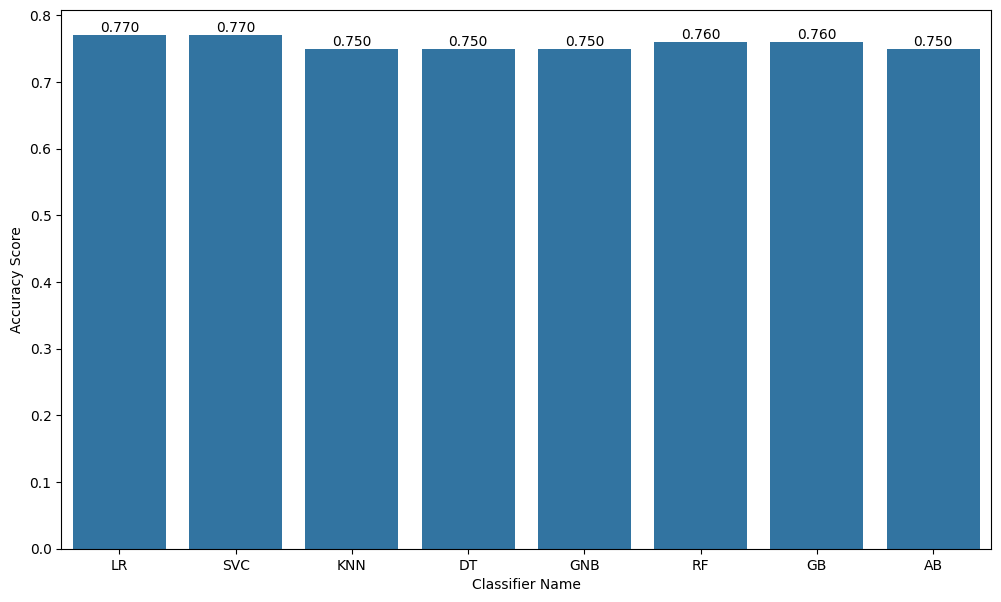

In [75]:
plt.subplots(figsize=(12,7))
axis = sns.barplot(x = 'Name', y = 'Score', data = k_fold_cross_val_score)
axis.set(xlabel='Classifier Name', ylabel='Accuracy Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.3f}'.format(height), ha="center")

plt.show()

# Observation:

The cross validation method shows "Logistic Regression, Support Vector Machine" is performing the best with high accuracy score out of all the 7 models

# Prediction with new values/unseen data using K nearest neighbors classifier model

In [76]:
diabetes_df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0  125.000  33.6   
1            1     85.0           66.0           29.0  125.000  26.6   
2            8    183.0           64.0           29.0  125.000  23.3   
3            1     89.0           66.0           23.0  112.875  28.1   
4            0    137.0           40.0           35.0  135.875  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     1.200   33        1

In [77]:
#Unseen data is given to the k nearest neighbors model to predict the outcome (max values of all the features are given)

new = [[17,200,104,45,334.86,50.25,2.42,81]]
sc_new = scaler.transform(new)
knc.predict(sc_new)

array([1])

In [78]:
new2 = [[0,44,40,13,14,18.2,0.078,21]]
sc_new2 = scaler.transform(new2)
knc.predict(sc_new2)

array([0])

In [79]:
new4 = [[8,183,64,29,125,23.3,0.672,32]]
sc_new4 = scaler.transform(new4)
knc.predict(sc_new4)

array([1])

# Thank You